# 1. Loading libraries and Data

In [ ]:
#importing necessary libararies
import re # for regular expressions
import nltk # for text manipulation
import string
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#changing the directory
%cd /content/drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
#loading the dataset
data = pd.read_csv('train_tweets.csv') 
#test = pd.read_csv('test_tweets.csv')

# 2. Data Inspection

In [ ]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [ ]:
#checking out some non-racist/non-sexist tweets
data[data['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [ ]:
#checking out some racist/sexist tweets
data[data['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [ ]:
#checking the dimensions of training dataset
data.shape

(31962, 3)

In [ ]:
#checking label-wise distribution in the dataset
data["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2.242 (7%) tweets labeled as racist or sexist, and 29,720(93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.



# 3. Data Cleaning

In [ ]:
def remove_pattern (input_txt, pattern):
  r=re.findall (pattern, input_txt)
  for i in r: 
    input_txt = re.sub(i,'', input_txt)
  return input_txt 

**1.Removing Twitter Handles**

In [ ]:
data['tidy_tweet'] = np. vectorize (remove_pattern) (data['tweet'],"@[\w]*")
data.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


**2. Removing Punctuations, Numbers and Special Characters**

In [ ]:
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head(10)

<ipython-input-12-eb37c6e5d020>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


**3. Removing Short Words**

In [ ]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
data.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


**4. Text Normalization**

In [ ]:
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split()) #tokenizing
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=''.join(tokenized_tweet[i])
data['tidy_tweet'] = tokenized_tweet

# 4. Story Generation & Visualization from tweets

**1. Understanding common words used in the tweet: WordCloud**

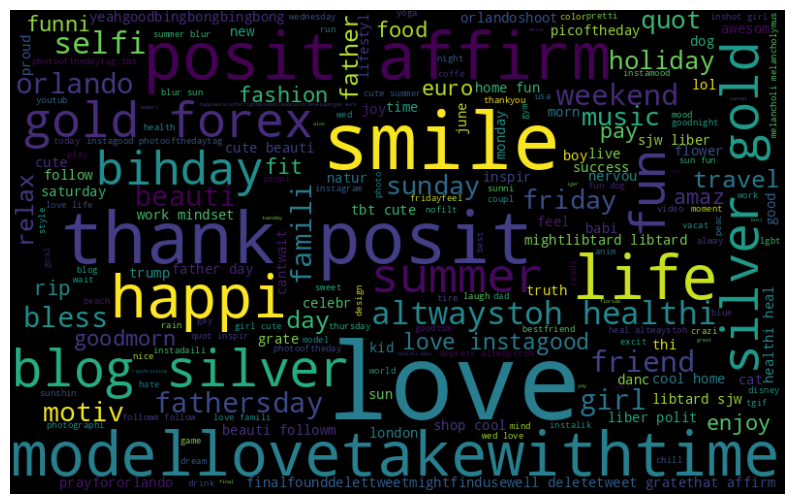

In [ ]:
all_words=' '.join([text for text in data['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud (width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**2. Words in non racist/non sexist tweets**

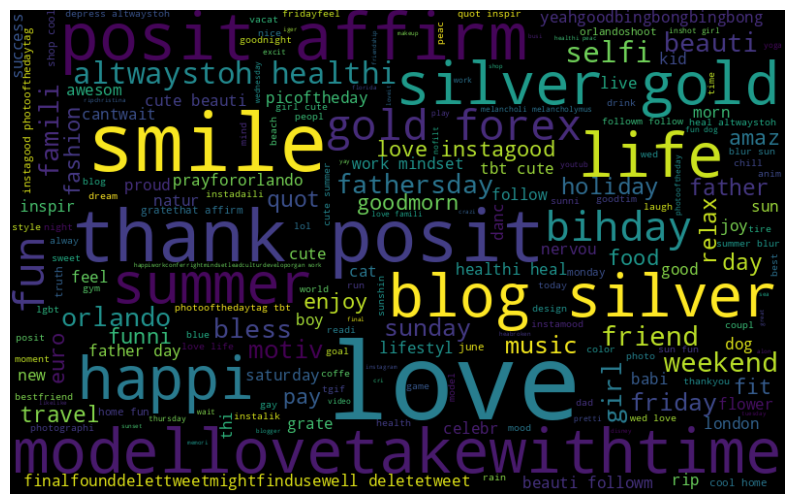

In [ ]:
normal_words = ' '.join([text for text in data['tidy_tweet'][data['label']==0]])
wordcloud = WordCloud (width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**3. Racist/Sexist Tweets**

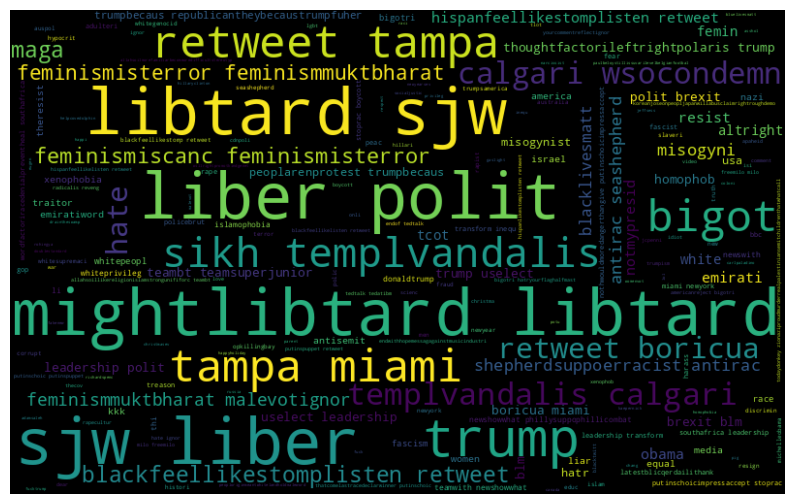

In [ ]:
negative_words = ' '.join([text for text in data['tidy_tweet'][data['label']==1]])
wordcloud = WordCloud (width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**4. Understanding the impact of Hashtags on tweet sentiment**

In [ ]:
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)",i)
    hashtags.append(ht)
  return hashtags

HT_regular = hashtag_extract(data['tidy_tweet'][data['label']==0])

HT_negative = hashtag_extract(data['tidy_tweet'][data['label']==1])

HT_regular = sum(HT_regular,[])

HT_negative = sum(HT_negative,[])

<function matplotlib.pyplot.show(close=None, block=None)>

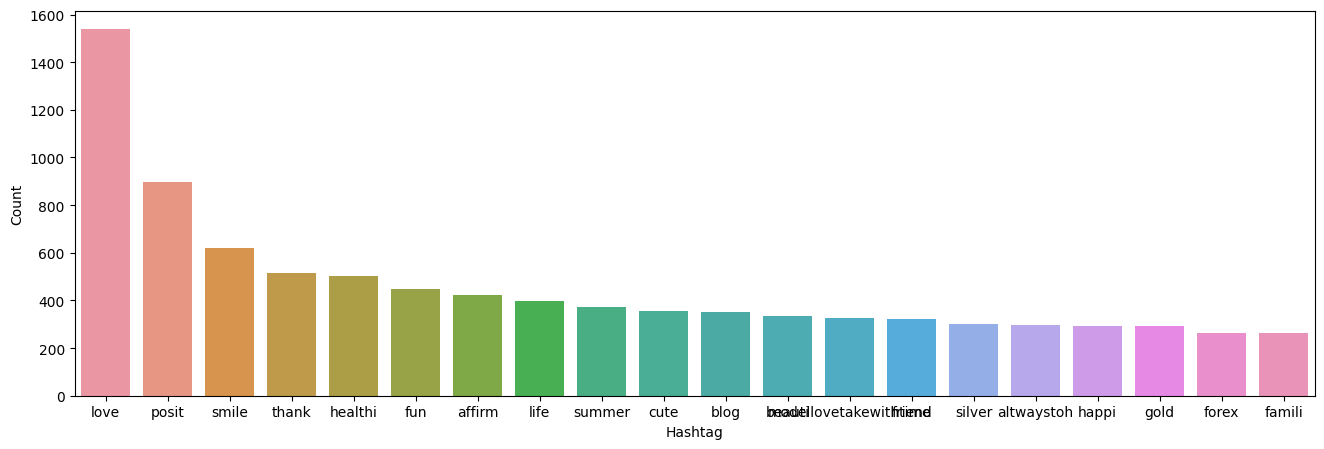

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d = d.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

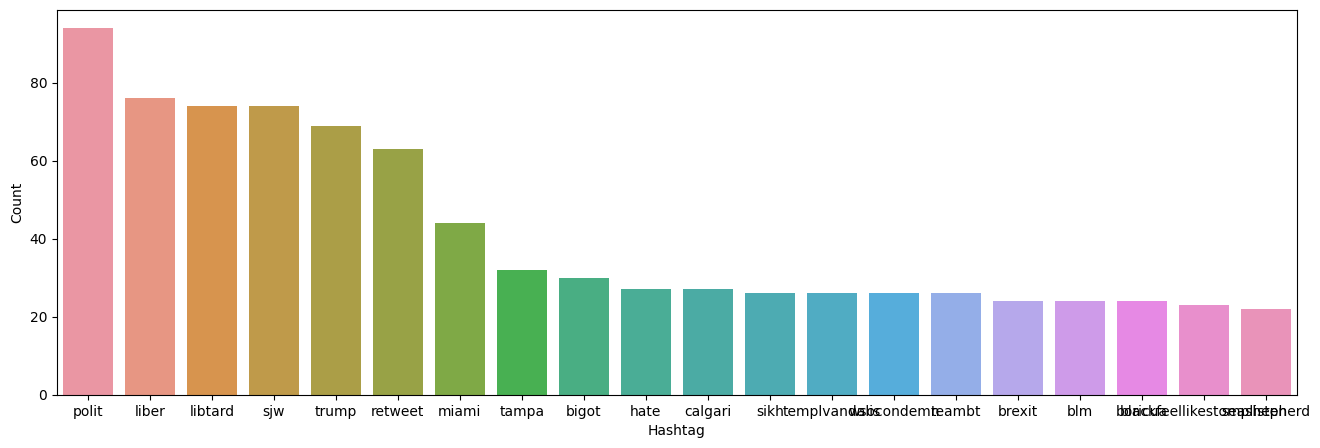

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e = e.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show

# 5. Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

1.**Bag-of-Words Features**

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['tidy_tweet'])
bow.shape

(31962, 1000)

**2.TF-IDF Features**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['tidy_tweet'])
tfidf.shape

(31962, 1000)

# 6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

**Bag-of-Words Features**

In [ ]:
xtrain_bow, xtest_bow, ytrain, ytest = train_test_split(bow, data['label'], random_state=42, test_size=0.3)

# Training logistic regression model on bow
lreg_bow = LogisticRegression()
lreg_bow.fit(xtrain_bow, ytrain)

# Making predictions on validation set and calculating F1 score on bow
prediction_bow = lreg_bow.predict_proba(xtest_bow)
prediction_int_bow = prediction_bow[:,1] >= 0.3
prediction_int_bow = prediction_int_bow.astype(np.int)
f1_score_bow = f1_score(ytest, prediction_int_bow)
print("F1 score on Bag-of-Words representation: ", f1_score_bow)


F1 score on Bag-of-Words representation:  0.4260485651214128


In [ ]:
xtrain_tfidf, xtest_tfidf, ytrain, ytest = train_test_split(tfidf, data['label'], random_state=42, test_size=0.3)

# Training logistic regression model on tfidf
lreg_tfidf = LogisticRegression()
lreg_tfidf.fit(xtrain_tfidf, ytrain)

# Making predictions on validation set and calculating F1 score on tfidf
prediction_tfidf = lreg_tfidf.predict_proba(xtest_tfidf)
prediction_int_tfidf = prediction_tfidf[:,1] >= 0.3
prediction_int_tfidf = prediction_int_tfidf.astype(np.int)
f1_score_tfidf = f1_score(ytest, prediction_int_tfidf)
print("F1 score on TF-IDF representation: ", f1_score_tfidf)

F1 score on TF-IDF representation:  0.43736263736263736
